In [28]:
import pickle
import numpy as np
import pandas as pd

df_fund = pickle.load(open("sp500_fund_2.p","rb"))
df = pickle.load(open("sp500.p", "rb"))

In [15]:
%matplotlib inline

In [16]:
from scipy.stats import linregress

# For Visualization
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [91]:
with open("sp500_fund.p","wb") as f:
    pickle.dump(df_fund, f)

In [87]:
with open("sp500.p","wb") as f:
    pickle.dump(df, f)

In [13]:
with open("sp500_merged.p","wb") as f:
    pickle.dump(df_sp500, f)

NameError: name 'df_sp500' is not defined

In [17]:
df.head()

,sector,ticker,ticker_id,sector_id,CIK
0,industrials,MMM,313,5,0000066740
1,health_care,ABT,6,4,0000001800
2,health_care,ABBV,4,4,0001551152
3,information_technology,ACN,7,6,0001467373
4,information_technology,ATVI,50,6,0000718877


In [18]:
df_fund.head()

,2010,2011,2012,2013,2014,2015,2016,company_id,indicator_id
0,NaN,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0,333612000.0,1000045,Assets
1,NaN,2803054.0,2797716.0,NaN,NaN,NaN,NaN,1000045,CashAndCashEquivalentsAtCarryingValue
2,NaN,785514.0,-5338.0,NaN,NaN,NaN,NaN,1000045,CashAndCashEquivalentsPeriodIncreaseDecrease
3,NaN,50000000.0,50000000.0,50000000.0,50000000.0,50000000.0,50000000.0,1000045,CommonStockSharesAuthorized
4,NaN,11960975.0,12154069.0,12220874.0,12415785.0,12466000.0,12524000.0,1000045,CommonStockSharesIssued


In [20]:
df_fund['indicator_id'].value_counts()

LiabilitiesAndStockholdersEquity                29436
Assets                                          29409
NetIncomeLoss                                   27888
StockholdersEquity                              27567
CashAndCashEquivalentsAtCarryingValue           27201
CashAndCashEquivalentsPeriodIncreaseDecrease    26280
RetainedEarningsAccumulatedDeficit              26277
CommonStockSharesAuthorized                     25824
NetCashProvidedByUsedInOperatingActivities      25323
CommonStockValue                                25245
CommonStockSharesIssued                         25221
NetCashProvidedByUsedInFinancingActivities      24975
CommonStockParOrStatedValuePerShare             24441
CommonStockSharesOutstanding                    23727
Liabilities                                     23691
AssetsCurrent                                   23199
LiabilitiesCurrent                              23184
PropertyPlantAndEquipmentNet                    23106
NetCashProvidedByUsedInInves

In [22]:
# most populated indicators based on https://www.kaggle.com/katerynad/data-exploring-part-4-pca

indicators=['Assets','LiabilitiesAndStockholdersEquity',
'StockholdersEquity',
'CashAndCashEquivalentsAtCarryingValue',
'NetCashProvidedByUsedInOperatingActivities',
'NetIncomeLoss',
'NetCashProvidedByUsedInFinancingActivities',
'CommonStockSharesAuthorized',
'CashAndCashEquivalentsPeriodIncreaseDecrease',
'CommonStockValue',
'CommonStockSharesIssued',
'RetainedEarningsAccumulatedDeficit',
'CommonStockParOrStatedValuePerShare',
'NetCashProvidedByUsedInInvestingActivities',
'PropertyPlantAndEquipmentNet',
'AssetsCurrent',
'LiabilitiesCurrent',
'CommonStockSharesOutstanding',
'Liabilities',
'OperatingIncomeLoss' ]

In [29]:
values = df_fund.loc[df_fund['indicator_id'].isin(indicators),
                     ['company_id','indicator_id','2011',
                     '2010', '2012', '2013', '2015', '2016']]

In [24]:
df_fund.head()

,2010,2011,2012,2013,2014,2015,2016,company_id,indicator_id
0,NaN,257236034.0,263835468.0,283429579.0,302528591.0,325309000.0,333612000.0,1000045,Assets
1,NaN,2803054.0,2797716.0,NaN,NaN,NaN,NaN,1000045,CashAndCashEquivalentsAtCarryingValue
2,NaN,785514.0,-5338.0,NaN,NaN,NaN,NaN,1000045,CashAndCashEquivalentsPeriodIncreaseDecrease
3,NaN,50000000.0,50000000.0,50000000.0,50000000.0,50000000.0,50000000.0,1000045,CommonStockSharesAuthorized
4,NaN,11960975.0,12154069.0,12220874.0,12415785.0,12466000.0,12524000.0,1000045,CommonStockSharesIssued


In [30]:
df.head()

,sector,ticker,ticker_id,sector_id,company_id
0,industrials,MMM,309,5,66740
1,health_care,ABT,6,4,1800
2,health_care,ABBV,4,4,1551152
3,information_technology,ACN,7,6,1467373
4,information_technology,ATVI,47,6,718877


In [31]:
# merge into new dataset
df_tmp = df_fund.copy()

df_sp500 = df_tmp.merge(df, left_on='company_id', 
                        right_on='company_id', how='inner')

In [73]:
len(df_sp500.index)

147021

In [78]:
df_sp500.sample(n=100)

,company_id,indicator_id,ticker_id,sector_id,sector,ticker,year,value
67872,46080,CashAndCashEquivalentsPeriodIncreaseDecrease,214,0,consumer_discretionary,HAS,2012,2.080130e+08
29002,1047122,RetainedEarningsAccumulatedDeficit,402,5,industrials,RTN,2011,1.165600e+10
180415,820313,CommonStockValue,44,6,information_technology,APH,2016,3.000000e+05
152111,766421,OperatingIncomeLoss,26,5,industrials,ALK,2015,1.298000e+09
38249,24741,CashAndCashEquivalentsAtCarryingValue,202,6,information_technology,GLW,2011,4.661000e+09
93774,38777,OperatingIncomeLoss,63,3,financials,BEN,2013,2.921300e+09
125121,753308,PropertyPlantAndEquipmentNet,329,10,utilities,NEE,2014,5.570500e+10
185261,96223,NetIncomeLoss,286,3,financials,LUK,2016,1.259380e+08
134764,1043604,CashAndCashEquivalentsPeriodIncreaseDecrease,257,6,information_technology,JNPR,2015,-2.187000e+08
150843,728535,AssetsCurrent,253,5,industrials,JBHT,2015,8.593670e+08


In [32]:
df_sp500 = pd.melt(df_sp500,id_vars=['company_id', 'indicator_id', 'ticker_id', 
                         'sector_id', 'sector', 'ticker'],
        var_name='year', value_name='value')

df_sp500 = df_sp500[pd.notnull(df_sp500['value'])]
df_sp500.head()

,company_id,indicator_id,ticker_id,sector_id,sector,ticker,year,value
195,1001250,Assets,157,1,consumer_staples,EL,2010,6.273900e+09
196,1001250,AssetsCurrent,157,1,consumer_staples,EL,2010,3.686500e+09
197,1001250,CashAndCashEquivalentsAtCarryingValue,157,1,consumer_staples,EL,2010,1.253000e+09
198,1001250,CashAndCashEquivalentsPeriodIncreaseDecrease,157,1,consumer_staples,EL,2010,1.323000e+08
199,1001250,CommonStockValue,157,1,consumer_staples,EL,2010,2.700000e+06


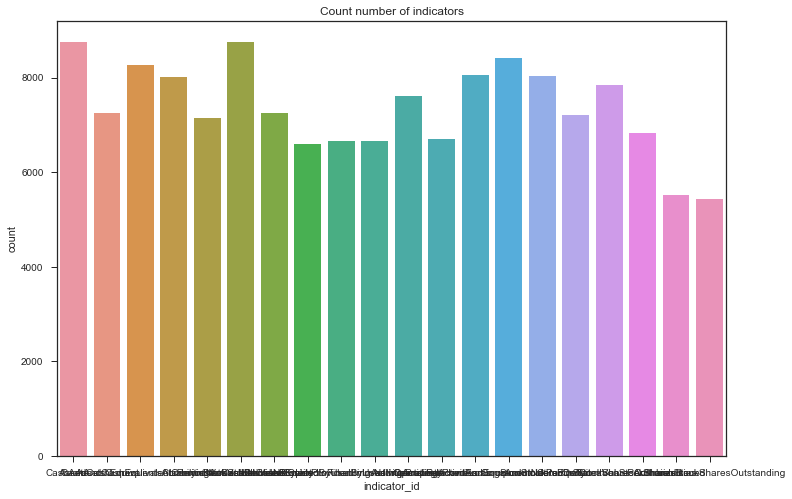

In [33]:
## AVAILABLE PARAMTERS

# count number of records by indicator category
sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(12,8))
ax=sns.countplot(x='indicator_id',data=df_sp500)
ax.set_title('Count number of indicators')


# How they correlate between each other.

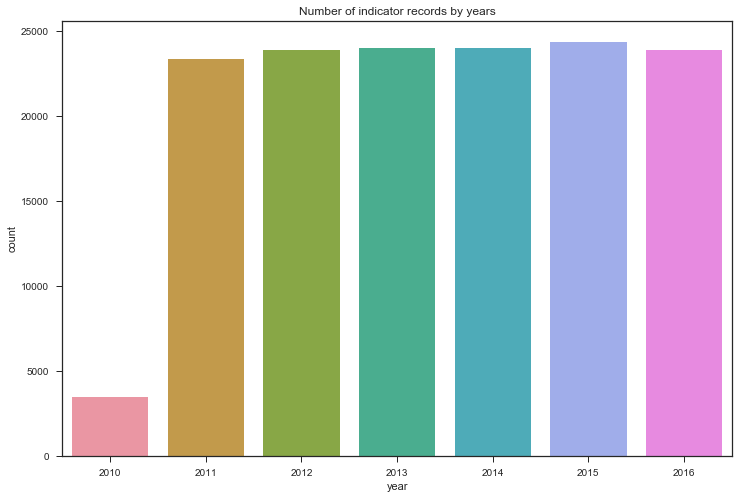

In [34]:
# count number of records by years
sns.set(style="ticks", palette="muted", color_codes=True)
plt.figure(figsize=(12,8))
ax=sns.countplot(x='year',data=df_sp500)
ax.set_title('Number of indicator records by years')

In [70]:
df_sp500.sample(n=10)

,company_id,indicator_id,ticker_id,sector_id,sector,ticker,year,value
51965,92230,CommonStockValue,59,3,financials,BBT,2011,3.486000e+09
14035,356028,CashAndCashEquivalentsAtCarryingValue,76,6,information_technology,CA,2010,3.049000e+09
135097,1048286,AssetsCurrent,294,0,consumer_discretionary,MAR,2015,1.384000e+09
124679,732717,CommonStockSharesAuthorized,431,9,telecommunication_services,T,2014,1.400000e+10
163963,1120193,CommonStockSharesOutstanding,328,3,financials,NDAQ,2016,1.665795e+08
95703,59478,CashAndCashEquivalentsPeriodIncreaseDecrease,280,4,health_care,LLY,2013,-1.886000e+08
135970,106640,CashAndCashEquivalentsPeriodIncreaseDecrease,482,0,consumer_discretionary,WHR,2015,-2.540000e+08
50954,908255,CommonStockSharesOutstanding,73,0,consumer_discretionary,BWA,2011,1.085145e+08
73098,788784,CashAndCashEquivalentsPeriodIncreaseDecrease,359,10,utilities,PEG,2012,-4.550000e+08
94640,4904,NetCashProvidedByUsedInFinancingActivities,15,10,utilities,AEP,2013,-4.490000e+08


In [35]:
# get correlation for 2015 year.
df_2015 = df_sp500.loc[df_sp500.year=='2015',:]
df_indicators = df_2015.pivot_table(index='company_id', columns="indicator_id", 
                    values="value")
df_indicators.head()

indicator_id,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockParOrStatedValuePerShare,CommonStockSharesAuthorized,CommonStockSharesIssued,CommonStockSharesOutstanding,CommonStockValue,Liabilities,LiabilitiesAndStockholdersEquity,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,RetainedEarningsAccumulatedDeficit,StockholdersEquity
company_id,,,,,,,,,,,,,,,,,,,,
1800,4.124700e+10,1.415500e+10,5.001000e+09,938000000.0,NaN,2.400000e+09,1.702017e+09,NaN,1.273400e+10,NaN,4.124700e+10,9.186000e+09,-2.236000e+09,406000000.0,2.966000e+09,4.423000e+09,2.867000e+09,5.730000e+09,2.575700e+10,2.121100e+10
2488,3.109000e+09,2.320000e+09,7.850000e+08,-20000000.0,0.01,1.500000e+09,8.060000e+08,7.920000e+08,8.000000e+06,NaN,3.109000e+09,1.403000e+09,5.900000e+07,147000000.0,-2.260000e+08,-6.600000e+08,-4.810000e+08,1.880000e+08,-7.306000e+09,-4.120000e+08
2969,1.743810e+10,2.910800e+09,2.064000e+08,-130200000.0,1.00,3.000000e+08,2.494556e+08,2.153591e+08,2.494000e+08,1.005700e+10,1.743810e+10,3.648100e+09,NaN,NaN,NaN,1.277900e+09,1.699100e+09,9.636900e+09,1.058040e+10,7.249000e+09
4127,3.719400e+09,1.914700e+09,1.043600e+09,237800000.0,0.25,5.250000e+08,2.190000e+08,1.903000e+08,4.760000e+07,5.602000e+08,3.719400e+09,4.639000e+08,NaN,NaN,NaN,7.983000e+08,1.023100e+09,8.264000e+08,1.469200e+09,3.159200e+09
4281,3.652800e+10,7.953000e+09,1.919000e+09,42000000.0,1.00,1.800000e+09,1.391211e+09,1.310160e+09,1.391000e+09,2.239700e+10,3.652800e+10,5.211000e+09,NaN,NaN,1.582000e+09,-3.220000e+08,NaN,1.481500e+10,8.834000e+09,1.204600e+10


In [36]:
df_indicators.corr()

indicator_id,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,CashAndCashEquivalentsPeriodIncreaseDecrease,CommonStockParOrStatedValuePerShare,CommonStockSharesAuthorized,CommonStockSharesIssued,CommonStockSharesOutstanding,CommonStockValue,Liabilities,LiabilitiesAndStockholdersEquity,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,NetIncomeLoss,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,RetainedEarningsAccumulatedDeficit,StockholdersEquity
indicator_id,,,,,,,,,,,,,,,,,,,,
Assets,1.000000,0.719313,0.892308,0.288375,0.057253,0.410949,0.548509,0.581221,0.261970,0.997016,1.000000,0.807541,-0.774272,0.475282,0.770641,0.489915,0.678791,0.177645,0.477752,0.845472
AssetsCurrent,0.719313,1.000000,0.767853,0.090043,0.057122,0.768350,0.600569,0.772871,0.223068,0.732173,0.719462,0.865142,-0.273531,-0.431331,0.684758,0.673710,0.596416,0.287554,0.453614,0.663672
CashAndCashEquivalentsAtCarryingValue,0.892308,0.767853,1.000000,0.724894,0.004048,0.380623,0.518370,0.647788,0.061729,0.903740,0.892327,0.667255,-0.203597,-0.380507,0.645988,0.374806,0.570184,0.080625,0.316850,0.704190
CashAndCashEquivalentsPeriodIncreaseDecrease,0.288375,0.090043,0.724894,1.000000,0.068869,0.133817,0.185441,0.380642,0.049211,0.181674,0.154451,0.029511,0.352574,-0.137668,-0.284070,0.155304,0.201303,-0.089561,0.035655,0.143437
CommonStockParOrStatedValuePerShare,0.057253,0.057122,0.004048,0.068869,1.000000,-0.038212,0.005683,0.007879,0.648448,0.039973,0.043813,0.067600,-0.019001,-0.000779,0.075516,0.021790,0.035880,0.203642,0.066984,0.041482
CommonStockSharesAuthorized,0.410949,0.768350,0.380623,0.133817,-0.038212,1.000000,0.808106,0.804944,0.239014,0.394854,0.407929,0.614534,-0.329342,0.040078,0.648716,0.607001,0.578292,0.306910,0.469380,0.601390
CommonStockSharesIssued,0.548509,0.600569,0.518370,0.185441,0.005683,0.808106,1.000000,0.974452,0.400022,0.526429,0.540420,0.613325,-0.411869,0.153947,0.607135,0.539366,0.618537,0.473340,0.663102,0.695227
CommonStockSharesOutstanding,0.581221,0.772871,0.647788,0.380642,0.007879,0.804944,0.974452,1.000000,0.233040,0.562845,0.581357,0.625004,-0.586360,0.534658,0.536671,0.547658,0.644408,0.316699,0.501970,0.743798
CommonStockValue,0.261970,0.223068,0.061729,0.049211,0.648448,0.239014,0.400022,0.233040,1.000000,0.232661,0.229460,0.242338,-0.087875,-0.015296,0.216134,0.320007,0.141737,0.391885,0.370569,0.311125


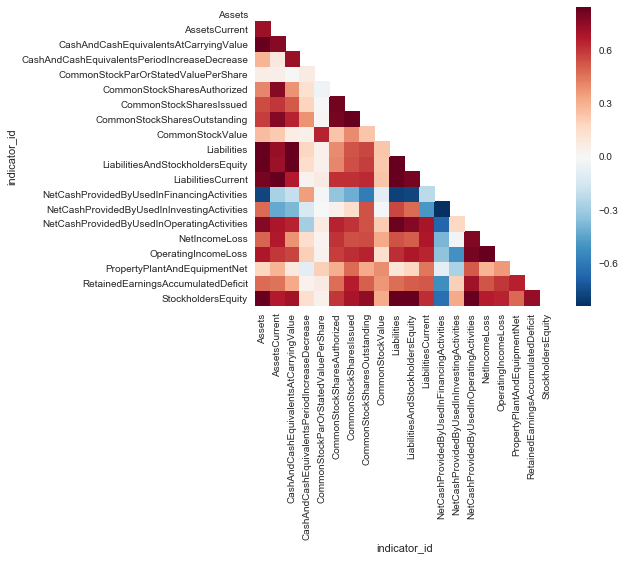

In [37]:
corr = df_indicators.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)

In [ ]:
#possibility to reduce dimensiality

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df_indicators.dropna())
df_indicators_scaled = scaler.transform(df_indicators.dropna())

print(df_indicators_scaled.mean())  
print(df_indicators_scaled.std())

3.33066907388e-17
1.0


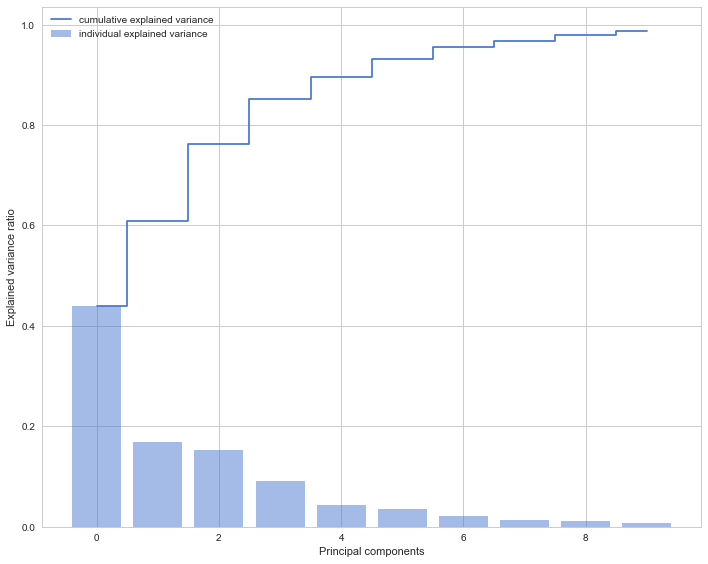

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(df_indicators_scaled)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 8))

    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()